# **Qubits States**

## Classical VS Quantum Bits

### _Statevectors_

In quantum physics we use _statevectors_ to describe the state of our system. This is different from classical physics where we generally just use numbers. For example, say we wanted to describe the position of a car along a track, this is a classical system so we could use a number $x$:

$$ x=4 $$

Alternatively, we could instead use a collection of numbers in a vector called a  _statevector._ Each element in the statevector contains the probability of finding the car in a certain place:

$$
|x\rangle = \begin{bmatrix} 0\\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
            \begin{matrix} \\  \\  \\ \leftarrow \\  \\  \\  \\ \end{matrix}
             \begin{matrix} \\  \\ \text{Probability of} \\ \text{car being at} \\ \text{position 4} \\  \\  \\ \end{matrix}   
$$


This isn’t limited to position, we could also keep a statevector of all the possible speeds the car could have, and all the possible colours the car could be. With classical systems (like the car example above), this is a silly thing to do as it requires keeping huge vectors when we only really need one number. But as we will see in this chapter, statevectors happen to be a very good way of keeping track of quantum systems, including quantum computers.

### _Qubit Notation_

With qubits we can measure each state with an amplitude. A qubit is a two-level system, so upon measurement* we will find it in one of two states:

$$ |0\rangle \quad \&  \quad |1\rangle $$

This means we need to keep track of two complex numbers. Vectors happen to be a great way of doing this:

$$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} $$

Here we use the elements of the vector ($|q_0\rangle$) to store a ‘list’ of the complex amplitudes of the states $|0\rangle$ and $|1\rangle$. In this case, $|0\rangle$ has amplitude $\tfrac{1}{\sqrt{2}}$ and $|1\rangle$ has amplitude $\tfrac{i}{\sqrt{2}}$. Notice that we denote a column vector by enclosing it between the $|$ and $\rangle$ symbols. The state's amplitude is related to the probability of measuring the qubit in that state. If our qubit is definitely in the state $|0\rangle$, the amplitude of $|0\rangle$ is 1, and the amplitude of $|1\rangle$ is 0. Thus we can write:

$$ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$

And similarly:

$$ |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

Note that $|0\rangle$ and $|1\rangle$ form an orthonormal basis, and we can represent any 2D vector with a combination of $|0\rangle$ and $|1\rangle$. Knowing this, we can write the state of our qubit in the alternative form:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$


This vector, $|q_0\rangle$ is called the qubit's _statevector,_ it tells us everything we could possibly know about this qubit. Since both $|0\rangle$ and $|1\rangle$ have non-zero amplitudes, the qubit is said to be in a _superposition_ of the states $|0\rangle$ and $|1\rangle$. 

### _Exploring Qubits With Qiskit_

In [1]:
import qiskit as qpk
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
%config InlineBackend.figure_format = 'svg'

In our quantum circuits, our qubits always start out in the state $|0\rangle$. We can use the qiskit function `Initialize()` to transform this into any state. We give `Initialize()` the vector we want, and apply it to the circuit:

In [2]:
from qiskit.extensions import Initialize 

qc = qpk.QuantumCircuit(1)
inital_state = [0,1]   # Define initial_state as |1>
init_op = Initialize(inital_state) 
qc.append(init_op,[0]) # Apply initialisation operation to the qubit (it's index is 0)
qc.draw()

┌─────────────────┐
q_0: |0>┤ Initialize(0,1) ├
        └─────────────────┘

In [3]:
backend = qpk.Aer.get_backend('statevector_simulator') 
out_state = qpk.execute(qc,backend).result().get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


In [4]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
     q_0: |0>┤ Initialize(0,1) ├─░─┤M├
             └─────────────────┘ ░ └╥┘
measure_0: 0 ═══════════════════════╩═

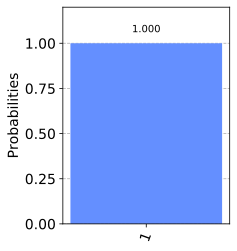

In [5]:
results = qpk.execute(qc,backend).result().get_counts()
plot_histogram(results,figsize=(3, 4))

We can see that we (unsurprisingly) have a 100% chance of measuring $|1\rangle$. This time, let’s instead put our qubit into a superposition and see what happens. We will use the state $|q_0\rangle$ from earlier in this section:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$


In [6]:
qc = qpk.QuantumCircuit(1)
inital_state = [1/sqrt(2), complex(0,1/sqrt(2))]
init_op = Initialize(inital_state)   
qc.append(init_op,[0])
state = qpk.execute(qc,backend).result().get_statevector()
print(state)

[0.70710678+0.j         0.        +0.70710678j]


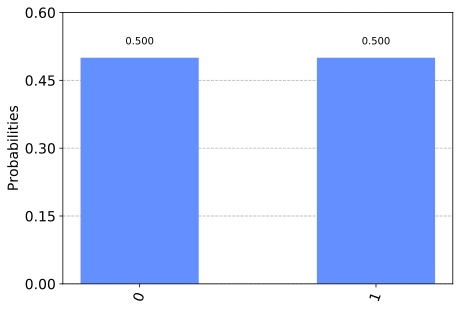

In [7]:
results = qpk.execute(qc,backend).result().get_counts()
plot_histogram(results)

We can see we have equal probability of measuring either $|0\rangle$ or $|1\rangle$. To explain this, we need to talk about measurement.

## Measurement

### _An Important Rule_

There is a simple rule for measurement. To find the probability of measuring a state $|\psi \rangle$ in the state $|x\rangle$ we do:

$$p(|x\rangle) = | \langle \psi| x \rangle|^2$$

Where $|x\rangle$ can be any qubit state. To find the probability of measuring $|x\rangle$, we take the inner product of $|x\rangle$ and the state we are measuring (in this case $|\psi\rangle$), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.

If we look at the state $|q_0\rangle$ from before, we can see the probability of measuring $|0\rangle$ is indeed $0.5$:

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle q_0| & = \tfrac{1}{\sqrt{2}}\langle0| - \tfrac{i}{\sqrt{2}}\langle 1| \\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle - \tfrac{i}{\sqrt{2}}\langle 1|0\rangle \\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\cdot 1 -  \tfrac{i}{\sqrt{2}} \cdot 0\\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\\
|\langle q_0| 0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

### _Normalisation_

This rule implies three things, the first is that the statevector should be normalised to 1.

If we want the probabilities to add up to 1 (which they should!) we need the magnitude of the state vector to be 1.

$$ \langle\psi|\psi\rangle = 1 \\ $$

Thus if:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

Then:

$$ \sqrt{|\alpha|^2 + |\beta|^2} = 1 $$

This explains the factors of $\sqrt{2}$ you have seen throughout this chapter. In fact, if we try to give `Initialize()` a vector that isn’t normalised, it will give us an error:

In [8]:
vector = [1,1]
Initialize(vector)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

**Exercise 1.** Create a state vector that will give a 1/3 probability of measuring the 0 state

In [9]:
# First of all we have to create the state vector
vector = [1/sqrt(3), complex(0, sqrt(2)/sqrt(3))]

In [10]:
# In order to check the normalisation of the state vector let's to do the inner product

import numpy as np

v_array = np.array(vector)
v_array_dash = np.conjugate(v_array).T
inner_product = v_array.dot(v_array_dash)
(round(inner_product.real, 2), inner_product.imag) # (Real, Imaginary)

(1.0, 0.0)

0.3333333333333334 



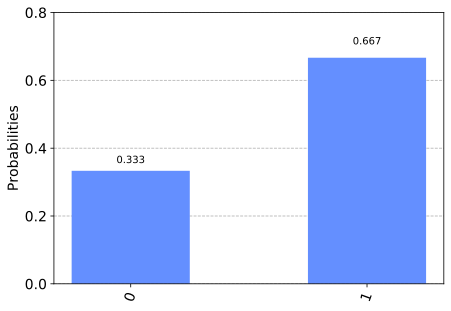

In [11]:
# There are two ways of check this, analytically and creating a quantum circuit
# let's try both

# Analytically
vector_0 = np.array([1, 0])

prob_v0 = abs(vector_0.dot(v_array)) ** 2
print(prob_v0, '\n')

# Quantum Circuit
qc = qpk.QuantumCircuit(1)
init_op = Initialize(vector)   
qc.append(init_op,[0])
state = qpk.execute(qc,backend).result().get_counts()
plot_histogram(state)

**Exercise 2.** Create a different state vector that will give the same measurement probabilities.

In [12]:
# Another vector that yields the same results

vector = [sqrt(1/3), sqrt(2/3)]

**Exercise 3.** Verify that the probability of measuring state 1 for both exercises is 2/3.

In [13]:
# On the previous plot we can check the probability of state 1

### _Global Phase_

The second implication is that the total phase of the qubit (global phase) does not matter to us, only the difference in phase between $|0\rangle$ and  $|1\rangle$ (relative phase). This is because the global phase disappears when we calculate the measurement probability. For example, the two states:

$$|a\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ i\end{bmatrix} \quad \& \quad |b\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}i \\ -1\end{bmatrix}$$

Are equivalent to us, since we can multiply one by a factor of $i$ to get the other:

$$ 
\begin{aligned} 
i\times\tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ i\end{bmatrix} & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}i \\ -1\end{bmatrix}\\
\\
i|a\rangle & = |b\rangle
\end{aligned}
$$

And when we calculate the measurement probability:

$$ |\langle x|a\rangle|^2 = |\langle x|i|a\rangle|^2 = |\langle x|b\rangle|^2 $$

### _The Observer Effect_ 

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

And find it in the state $|0\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $|0\rangle$. This means the act of measuring _changes_ the state of our qubits.

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

In fact, measuring not only changes the state of our qubits, it _destroys_ the superposition of our qubit, replacing it with one of two definite states. As a result, we almost always place the measurements at the end of our circuit. We sometimes refer to this destructive measurement as _collapsing_ the state of the qubit.

##### **a note about quantum simulators**

We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (`0` or `1`) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

`0110111110`

Just 10 digits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: The `qasm_simulator` behaves as if you are interacting with a real quantum computer, and will not allow you to use `.get_statevector()`. Alternatively, `statevector_simulator`, (which we have been using in this chapter) does allow peaking at the quantum states before measurement, as we have seen. 

## The Bloch Sphere

We saw earlier in this chapter that the general state of a qubit ($|q\rangle$) is:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

(The second line tells us $\alpha$ and $\beta$ are complex numbers). The first two implications in section 2 tell us that we cannot differentiate between some of these states. This means we can be more specific in our description of the qubit. 

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Finally, since the qubit state must be normalised, i.e.

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

we can use the trigonometric identity:

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

We want to plot our general qubit state:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

If we interpret $\theta$ and $\phi$ as spherical co-ordinates ($r = 1$, since the magnitude of the qubit state is $1$), we can plot any qubit state on the surface of a sphere, known as the _Bloch sphere._

Below we have plotted a qubit in the state $|{+}\rangle$. In this case, $\theta = \pi/2$ and $\phi = 0$.

(Qiskit has a function to plot a bloch sphere, `plot_bloch_vector()`, but at the time of writing it only takes cartesian coordinates. We have included a function that does the conversion automatically).

In [14]:
import aux_functions as af
from math import pi

In [15]:
x, y, z = af.sphericaltocartesian(1.0, 0, pi/2)

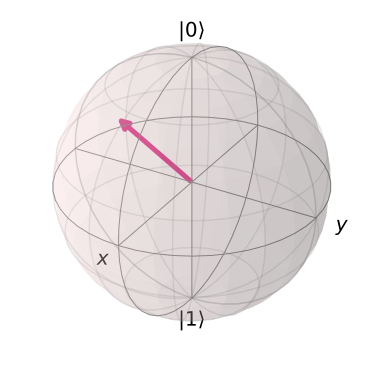

In [16]:
plot_bloch_vector([x, y, z])

**Exercise 4.** Plot the following vectors:

a. $|0\rangle$
b. $|1\rangle$
c. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
d. $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$
e. $\begin{bmatrix}i\\1\end{bmatrix}$

a

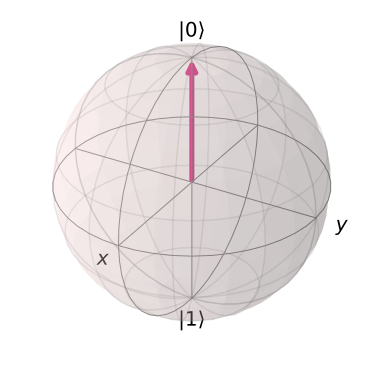

In [17]:
plot_bloch_vector([0, 0, 1])

b

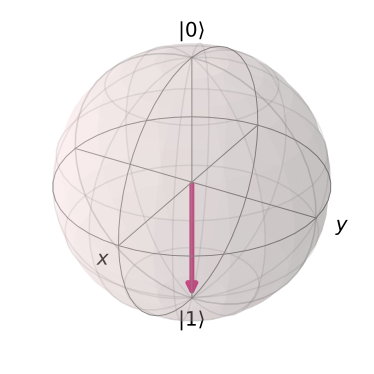

In [18]:
plot_bloch_vector([0, 0, -1])

c

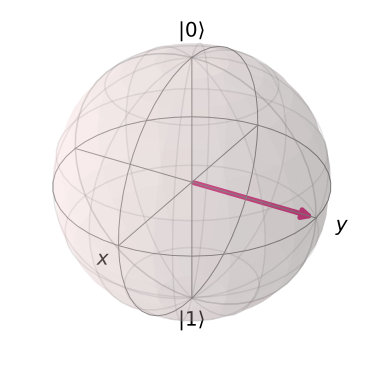

In [19]:
plot_bloch_vector([0, 1, 0])

d

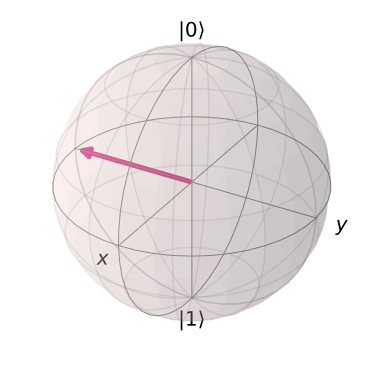

In [20]:
plot_bloch_vector([0, -1, 0])

e

This is not an state because the lack of normalization